In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Write code to project the population forward, tracking the population 
# size at time t in the vector `x_t`. Include a parameter that allows to 
# discard the first part of the time series, because we want to 
# remove transient dynamics.


# the equation, projecting x_t into x_t + 1 given r
def logistic_map(x_t, r):
    return r * x_t * (1.0 - x_t)

# test the function
print(logistic_map(0.5, 2.))

0.5


In [2]:
def time_series(x_0, r, maxit, discard = 0.5):
    t = np.arange(maxit)
    x_t = np.arange(maxit, dtype="float32")
    x_t[0] = x_0
    for i in range(1, maxit):
        x_t[i] = logistic_map(x_t[i - 1], r)
    # now discard the first part (transient)
    t = t[int(discard * maxit):]
    x_t = x_t[int(discard * maxit):]
    return(t, x_t, r, x_0)


In [3]:
print(time_series(0.25, 2,  10, 0))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0.25      , 0.375     , 0.46875   , 0.49804688, 0.49999237,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
      dtype=float32), 2, 0.25)


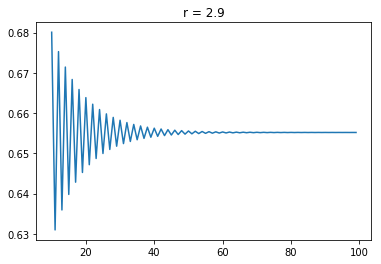

In [4]:
def plot_time_series(time_series):
    plt.plot(time_series[0], time_series[1])
    plt.title('r = ' +  str(round(time_series[2],3)))
    plt.show()

# test the function
plot_time_series(time_series(0.2, 2.9, 100, 0.1))

In [7]:
from scipy.signal import argrelextrema
def get_minmax(x_t):
    local_max = x_t[argrelextrema(x_t, np.greater)[0]]
    local_min = x_t[argrelextrema(x_t, np.less)[0]]
    return np.concatenate((local_max, local_min))

from IPython import display
import time

def plot_bifurcation(rs, x_0, 
                     maxit, discard, 
                     xmin = 0, xmax = 4,
                     ymin = -0.1, ymax = 1):
    r_vals = []
    x_vals = []
    for r in rs:
        ts = time_series(x_0, r, maxit, discard)
        my_vals = set(np.round(get_minmax(ts[1]), 3))
        if len(my_vals) == 0:
            my_vals = np.array(ts[1][-2:])
        for v in my_vals:
            r_vals.append(r)
            x_vals.append(v)
        if list(rs).index(r) % 100 == 99:
            plt.xlim((xmin, xmax))
            plt.ylim((ymin, ymax))
            plt.plot(r_vals, x_vals, linestyle = "", 
                     marker = ".", markersize = 0.3,
                     color = "b", alpha = 0.7)
            plt.title('Bifurcation diagram')
            display.clear_output(wait=True)
            display.display(plt.gcf())   
            plt.gcf().clear()
            time.sleep(0.05)
    return None

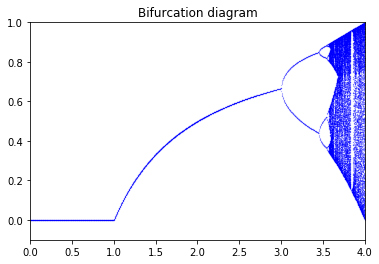

<Figure size 432x288 with 0 Axes>

In [8]:
plot_bifurcation(np.linspace(0, 4, num = 1500), 0.5, 7000, 0.97)

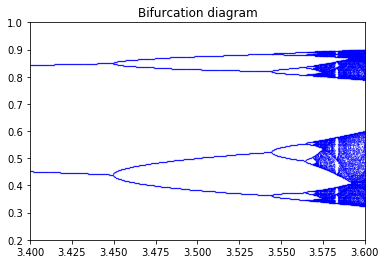

<Figure size 432x288 with 0 Axes>

In [12]:
plot_bifurcation(np.linspace(3.4, 3.6, num = 2000), 0.5, 7000, 0.98, xmin = 3.4, xmax = 3.6, ymin = 0.2)

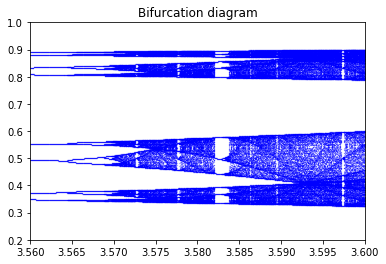

<Figure size 432x288 with 0 Axes>

In [10]:
plot_bifurcation(np.linspace(3.56, 3.6, num = 2000), 0.5, 7000, 0.98, xmin = 3.56, xmax = 3.6, ymin = 0.2)